# Algorytmy tekstowe

In [208]:
from datetime import datetime
import matplotlib.pyplot as plt

# Dane wejściowe

In [186]:
f = open("1997_714_head.txt", "r", encoding="utf8")
text = f.read()
f.close()

arr = ["bbbd", "aabbabd", "ababcd", "abcbccd"]

# Sprawdzenie markera

In [191]:
def check_marker(text):
    text = text.strip("\n\t")
    #text = text.replace("\n", " ")
    markers = {}
    for i in range(len(text)):
        if text[i] in markers:
            markers[text[i]] += 1
        else:
            markers[text[i]] = 1

    if markers[text[-1]] == 1:
        return text

    unique_chars = ["$", "#", "@", "&", "*", "^"]
    special_char = ""
    for unique_char in unique_chars:
        if unique_char not in markers:
            special_char = unique_char
            break

    tmp_text = list(text)
    tmp_text.append(special_char)
    text = "".join(tmp_text)
    return text

# Algorytm konstruujący strukturę trie suffiksów

In [136]:
class Node:
    def __init__(self, char="", parent=None):
        self.char = char
        self.children = {}
        self.parent = parent

    def add_child(self, char):
        self.children[char] = Node(char, parent=self)

    def has_child(self, char):
        if char in self.children:
            return True
        else:
            return False

    def get_child(self, char):
        return self.children.get(char)


class Trie:
    def __init__(self, text):
        self.root = Node()
        self.insert(text)

    def insert(self, word):
        node = self.root
        for i in range(len(word)):
            for c in word[i:]:
                if node.has_child(c):
                    node = node.get_child(c)
                else:
                    node.add_child(c)
                    node = node.get_child(c)
            node = self.root

    def find(self, word):
        node = self.root
        for c in word:
            if node.has_child(c):
                node = node.get_child(c)
            else:
                return False
        return True

# Algorytm konstruujący drzewo suffiksów

In [137]:
class TreeNode:
    def __init__(self, start=0, length=0, parent=None):
        self.start = start
        self.length = length
        self.children = {}
        self.parent = parent

    def add_child(self, c, child):
        child._set_parent(self)
        self.children[c] = child

    def has_child(self, c):
        if c in self.children:
            return True
        else:
            return False

    def get_child(self, c):
        return self.children.get(c)

    def get_parent(self):
        return self.parent

    def get_length(self):
        return self.length

    def get_start(self):
        return self.start

    def _set_parent(self, parent):
        self.parent = parent

    def set_start(self, start):
        self.start = start

    def set_length(self, length):
        self.length = length
        

class SuffixTree:
    def __init__(self, text):
        self.text = text
        self.root = TreeNode()
        self.create_tree()

    def create_tree(self):
        node = self.root
        depth = 0
        n = len(self.text)
        for i in range(n):
            k = 0 # matched suffix length
            while i + depth < n and node.get_length() == depth and node.has_child(self.text[i + depth]):
                node = node.get_child(self.text[i + depth])
                depth = 1 # current node matched suffix length
                k += 1
                while i+depth<n and i+k<n and depth < node.get_length() and self.text[node.get_start() + depth] == self.text[
                    i + k]:
                    depth += 1
                    k += 1

            if node.get_length() > depth:
                parent = node.get_parent()
                new_node = TreeNode(node.get_start(), depth, parent) #Matched chars in current node
                new_node.add_child(self.text[node.get_start() + depth], node)
                node.set_start(node.get_start() + depth) #The remainder of the current node = node (node / new_node)
                node.set_length(node.get_length() - depth)
                parent.add_child(self.text[new_node.get_start()], new_node)
                node = new_node
            
            # Unmatched suffix (text[i+k:])
            leaf = TreeNode(start=i + k, length=n - i - k, parent=None)
            node.add_child(self.text[leaf.get_start()], leaf)

            node = self.root
            depth = 0

    def find(self, word):
        node = self.root
        i = 0
        n = len(word)
        while i < n:
            if node.has_child(word[i]):
                node = node.get_child(word[i])
                if self.text[node.get_start():node.get_start() + node.get_length()] != word[i:(i + node.get_length())]:
                    return False
                i += node.get_length()
            else:
                return False
        return True

# Test poprawności

In [198]:
for elem in arr[:]: # ["bbbd", "aabbabd", "ababcd", "abcbccd", text]
    elem = check_marker(elem)
    print(elem)
    trie = Trie(elem)
    tree = SuffixTree(elem)
    
    for i in range(len(elem)):
        suffix = elem[i:]
        if trie.find(suffix) is False or tree.find(suffix) is False:
            print("Failed")

            
# Czasem nie działa dla całego tekstu ustawy
elem = check_marker(text)
n = len(elem)
print(elem)
trie = Trie(elem)
tree = SuffixTree(elem)
for i in range(n-30,n):
    suffix = elem[i:]
    if trie.find(suffix) is False or tree.find(suffix) is False:
        print("Failed!")

bbbd
aabbabd
ababcd
abcbccd
Dz.U. z 1998 r. Nr 144, poz. 930
                                       
                                       
                                       
                                       
                                    USTAWA
                          z dnia 20 listopada 1998 r.
                                       
         o zryczałtowanym podatku dochodowym od niektórych przychodów
                        osiąganych przez osoby fizyczne
                                       
                                  Rozdział 1
                                Przepisy ogólne
                                       
                                    Art. 1.
Ustawa reguluje opodatkowanie zryczałtowanym podatkiem dochodowym niektórych
przychodów (dochodów) osiąganych przez osoby fizyczne prowadzące pozarolniczą
działalność gospodarczą oraz przez osoby duchowne.
                                       
                                    Art. 2.
1. Osoby 

# Time tests

In [215]:
def trie_test(text):
    start = datetime.now()
    Trie(text)
    return (datetime.now() - start).total_seconds()
def tree_test(text):
    start = datetime.now()
    SuffixTree(text)
    return (datetime.now() - start).total_seconds()

In [255]:
trie_times = []
tree_times = []
for i in range(1600,len(text)):
    trie_times.append(trie_test(text[i:]))
    tree_times.append(trie_test(text[i:]))

Text(0, 0.5, 'Time [s]')

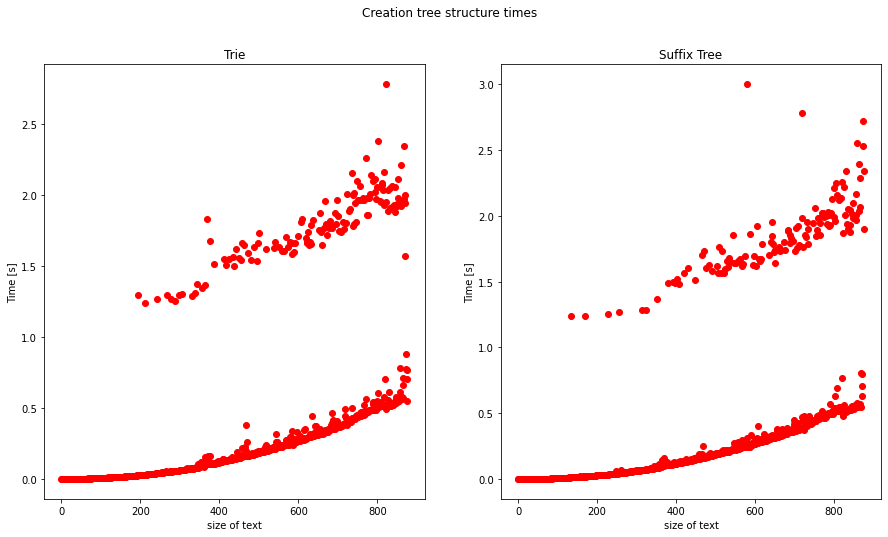

In [256]:
size = [i for i in range(0,len(text)-1600)]

trie_times = trie_times[::-1]
tree_times = tree_times[::-1]

fig, ax = plt.subplots(1, 2, figsize=(15,8))
fig.suptitle("Creation tree structure times")
ax[0].plot(size, trie_times, "ro")
ax[0].set_title("Trie")
ax[0].set_xlabel("size of text")
ax[0].set_ylabel("Time [s]")
ax[1].plot(size, tree_times, "ro")
ax[1].set_title("Suffix Tree")
ax[1].set_xlabel("size of text")
ax[1].set_ylabel("Time [s]")
